# Generate Poetry

# Step 1: Handle the data
## Load

In [ ]:
# From Google Drive with Colaboratory

from google.colab import drive
import os

drive.mount('/content/gdrive')
os.listdir("/content/gdrive/MyDrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['datasets', 'Colab Notebooks']

In [ ]:
# Replace with yours
folder = "/content/gdrive/MyDrive/datasets/poetry/"
print(f"Number of files: {len(os.listdir(folder))}")
os.listdir(folder)[:5]

Number of files: 50


['bruce-springsteen.txt',
 'drake.txt',
 'blink-182.txt',
 'kanye-west.txt',
 'johnny-cash.txt']

In [ ]:
# Number of files we wanna load
n_files = 10

all_data = ""
for filename in os.listdir(folder)[:n_files]:
  if not ".txt" in filename:
    continue
  with open(folder + filename, 'r') as f:
    try:
      all_data += f.read()
      all_data += "\n<end>\n"  # to know where a files end
    except UnicodeDecodeError as e:
      print("Error with file", filename, ":", e)
print(all_data[:200], "\n...\n", all_data[-200:])

[Verse 1]
They come from everywhere
A longing to be free
They come to join us here
From sea to shining sea And they all have a dream
As people always will
To be safe and warm
In that shining city on t 
...
 -hearted many
The open-hearted few And no one knows where the night is going
And no one knows why the wine is flowing
Oh, love I need you, I need you, I need you, I need you, oh
I need you now 
<end>



## Clean

* Remove content between () and []
* Remove commas ","
* Normalize length of sentences

In [ ]:
import re 

cleaned_data = []

#length_histogram = dict.fromkeys(range(30), 0)
#length_histogram.update({">=30": 0})
length_histogram = [0] * 31

i = 0

for i, sentence in enumerate(all_data.split("\n")):
    s = re.sub("[\(\[].*?[\)\]]", "", sentence)
    s = s.replace(",", "")
    s = s.replace(";", "")
    s = s.lower()

    if s:
      length = len(s.split(" "))
      if length >= 30:
        length_histogram[30] += 1
      else:
        length_histogram[length] += 1
      cleaned_data.append(s)

print(length_histogram)

[0, 428, 607, 1269, 2450, 3054, 3802, 3350, 3527, 2964, 2578, 1911, 1328, 846, 507, 444, 316, 222, 198, 161, 119, 88, 53, 45, 32, 23, 13, 12, 4, 10, 21]


In [ ]:
print([str(i) for i in range(30)] + ["30+"], length_histogram)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30+'] [0, 428, 607, 1269, 2450, 3054, 3802, 3350, 3527, 2964, 2578, 1911, 1328, 846, 507, 444, 316, 222, 198, 161, 119, 88, 53, 45, 32, 23, 13, 12, 4, 10, 21]


<BarContainer object of 31 artists>

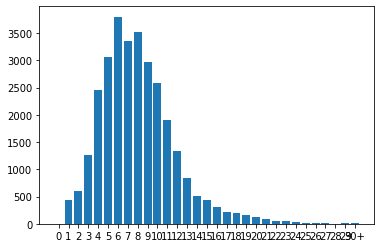

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar([str(i) for i in range(30)] + ["30+"], length_histogram)

In [ ]:
print(f"At this point, {round(length_histogram[6]/sum(length_histogram)*100, 2)}% of our sentences have a length of 6")

At this point, 12.51% of our sentences have a length of 6


Most of the sentences have a length of 6 words. So that's the length I chose to normalize my sequences with.

In [ ]:
# We will use this technique to normalize our sequences in the next cell
d = "1 2 3 4 5 6 7 8"
w = d.split(" ")
print(' '.join(w[:6]))
print(' '.join(w[6:]))
print(' '.join(w[:6] + w[6:]))

1 2 3 4 5 6
7 8
1 2 3 4 5 6 7 8


In [ ]:
normalized_data = []

i = 0  # current position
j = 1  # position of the next sequence

tmp_data = cleaned_data.copy()
tmp_data.append("")
n_lines = len(tmp_data)

while i + j < n_lines:

  words1 = tmp_data[i].split(" ")
  l1 = len(words1)

  words2 = tmp_data[i + j].split(" ")
  l2 = len(words2)

  if l1 == 6:
    normalized_data.append(tmp_data[i])
    i += 1
    if j > 1:
      j -= 1

  elif l1 > 6:
    normalized_data.append(' '.join(words1[:6]))
    tmp_data[i] = ' '.join(words1[6:])
    # loop not incremented because we want to continue to process cleaned_data[i]
  
  else: # l1 < 6

    if "<end>" in words2:
      if tmp_data[i]:
        normalized_data.append(tmp_data[i])
      i = i + j + 1
      j = 1

    elif (l1 + l2) <= 6:
      tmp_data[i] = ' '.join(words1 + words2)
      tmp_data[i + j] = ""
      j += 1

    else:
      pivot = 6 - l1
      normalized_data.append(' '.join(words1 + words2[:pivot]))
      tmp_data[i + j] = ' '.join(words2[pivot:])
      i = i + j
      j = 1

normalized_data.append(tmp_data[i]) 

[0, 1, 1, 4, 0, 3, 40978, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<BarContainer object of 31 artists>

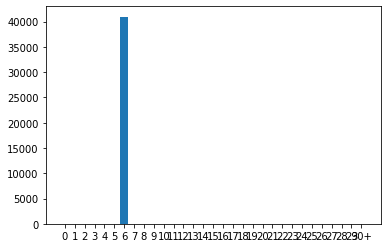

In [ ]:
length_histogram = [0] * 31

i = 0

for i, s in enumerate(normalized_data):
    length = len(s.split(" "))
    if length >= 30:
      length_histogram[30] += 1
    else:
      length_histogram[length] += 1

print(length_histogram)

fig, ax = plt.subplots()
ax.bar([str(i) for i in range(30)] + ["30+"], length_histogram)

In [ ]:
print(f"Now, {round(length_histogram[6]/sum(length_histogram)*100, 2)}% of our sentences have a length of 6")

Now, 99.98% of our sentences have a length of 6


In [ ]:
# Remove duplicatas

print(len(normalized_data))
normalized_data = list(set(normalized_data))
print(len(normalized_data))

40987
37910


# Step2 : Train in a minimal model

We want to generate poetry - so 
* X, the features, will be the 5 first words of our 6-word sequence
* y, the target, will be the 6th word

We treat this is a classification task: the output will be the next word, chosen among the vocabulary.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(normalized_data)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'i': 2, 'you': 3, 'and': 4, 'a': 5, 'to': 6, 'me': 7, 'my': 8, 'in': 9, 'it': 10, 'that': 11, 'on': 12, 'of': 13, 'your': 14, 'like': 15, 'we': 16, "i'm": 17, 'with': 18, 'for': 19, 'is': 20, 'all': 21, 'but': 22, 'up': 23, 'be': 24, 'know': 25, 'got': 26, 'this': 27, 'just': 28, 'so': 29, 'they': 30, 'no': 31, 'when': 32, 'oh': 33, 'she': 34, 'love': 35, "don't": 36, 'was': 37, 'now': 38, 'what': 39, 'do': 40, 'im': 41, 'one': 42, 'if': 43, 'out': 44, 'go': 45, 'yeah': 46, 'get': 47, 'down': 48, 'can': 49, "it's": 50, 'at': 51, 'not': 52, 'her': 53, 'baby': 54, 'he': 55, 'say': 56, 'girl': 57, 'from': 58, 'back': 59, 'time': 60, 'need': 61, 'never': 62, 'see': 63, 'make': 64, 'have': 65, 'right': 66, "you're": 67, 'let': 68, 'are': 69, 'how': 70, 'man': 71, 'come': 72, 'as': 73, 'want': 74, 'there': 75, 'way': 76, 'said': 77, 'here': 78, 'then': 79, 'been': 80, 'dont': 81, 'will': 82, 'take': 83, 'where': 84, 'had': 85, 'tell': 86, 'night': 87, 'well': 88, "ain't": 89, 'too

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

sequences = np.array(tokenizer.texts_to_sequences(normalized_data))
sequences = pad_sequences(sequences, maxlen=6, padding='pre')

print(sequences.shape)

(40987, 6)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [ ]:
X = sequences[:, :5]

target = sequences[:, 5]
y = keras.utils.to_categorical(target, num_classes=total_words)

print(X.shape)
print(y.shape)

(40987, 5)
(40987, 13144)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(y_train.shape)

(30740, 5)
(30740, 13144)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

model = keras.Sequential([
                          
  keras.layers.Embedding(total_words, 100, input_length=5),

  keras.layers.Bidirectional(LSTM(150)),

  keras.layers.Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=2)

Epoch 1/2
961/961 [==============================] - 78s 77ms/step - loss: 6.7595 - accuracy: 0.0387
Epoch 2/2
961/961 [==============================] - 84s 88ms/step - loss: 6.4055 - accuracy: 0.0509


# Step3 : Improve the model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

model2 = keras.Sequential([
                          
  keras.layers.Embedding(total_words, 100, input_length=5),

  keras.layers.Bidirectional(LSTM(150, return_sequences=True)),
  keras.layers.Bidirectional(LSTM(150, return_sequences=True)),
  keras.layers.Bidirectional(LSTM(150)),

  keras.layers.Dense(total_words, activation='softmax')
])

model2.compile(loss='categorical_crossentropy', 
               optimizer=keras.optimizers.Adam(learning_rate=0.01), 
               metrics=["accuracy"])

In [ ]:
history = model2.fit(X_train, y_train, epochs=5)

Epoch 1/5
961/961 [==============================] - 115s 108ms/step - loss: 6.7342 - accuracy: 0.0409
Epoch 2/5
961/961 [==============================] - 106s 111ms/step - loss: 6.3472 - accuracy: 0.0497
Epoch 3/5
961/961 [==============================] - 104s 108ms/step - loss: 6.1807 - accuracy: 0.0589
Epoch 4/5
961/961 [==============================] - 107s 111ms/step - loss: 6.0710 - accuracy: 0.0630
Epoch 5/5
961/961 [==============================] - 104s 108ms/step - loss: 6.0014 - accuracy: 0.0661


In [ ]:
history = model2.fit(X_train, y_train, epochs=20)

Epoch 1/20
961/961 [==============================] - 104s 108ms/step - loss: 5.9509 - accuracy: 0.0696
Epoch 2/20
961/961 [==============================] - 105s 109ms/step - loss: 5.9162 - accuracy: 0.0728
Epoch 3/20
961/961 [==============================] - 104s 108ms/step - loss: 5.8920 - accuracy: 0.0767
Epoch 4/20
961/961 [==============================] - 104s 108ms/step - loss: 5.8890 - accuracy: 0.0803
Epoch 5/20
961/961 [==============================] - 104s 109ms/step - loss: 5.8861 - accuracy: 0.0849
Epoch 6/20
961/961 [==============================] - 106s 110ms/step - loss: 5.7927 - accuracy: 0.0868
Epoch 7/20
961/961 [==============================] - 105s 109ms/step - loss: 5.7316 - accuracy: 0.0911
Epoch 8/20
961/961 [==============================] - 104s 109ms/step - loss: 5.7195 - accuracy: 0.0951
Epoch 9/20
961/961 [==============================] - 105s 110ms/step - loss: 5.7524 - accuracy: 0.0971
Epoch 10/20
961/961 [==============================] - 106s 110m

# Step3: Enjoy our poem generator!

In [81]:
words = normalized_data[2].split(" ")[:5]

n_sentences = 8
n_words = 6 * n_sentences

i = 5

while i < n_words:
  seed_text = ' '.join(words[-5:])
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=5, padding='pre')
  probabilities = model2.predict(token_list) 
  predicted = np.argmax(probabilities, axis=-1)[0]
  output_word = tokenizer.index_word[predicted]
  words.append(output_word)
  if i % 6 == 0:
    print(' '.join(words[-6:]))
  i += 1

hollerin at them losers and out
out got all your me you
never you never do it i
do it is it you do
that the i got her a
me you never me you do
it you do it you do
